In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans

In [3]:
default = pd.read_csv("C:/Users/khan1/OneDrive/Desktop/Classes smu/Fall Mod B/datamining/hw2clean/DM hw2 dataset_clean.csv")

 
default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
# using iloc to get the data from dataframe according to indexes
x = default.iloc[:, :-1]
y = default.iloc[:, -1]
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

In [20]:
# split data into 70% (training) and 30% (testing)
from sklearn.model_selection import train_test_split
# split the data for multiple times 
def multi_split(x, y, model, count):
    train_score = []
    test_score = []
    for i in range(count):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))
    return np.array(train_score), np.array(test_score)
        
train_score, test_score = multi_split(x,y,classifier, 10)

In [ ]:
x.shape
np.sqrt(x.shape[0]*0.7)

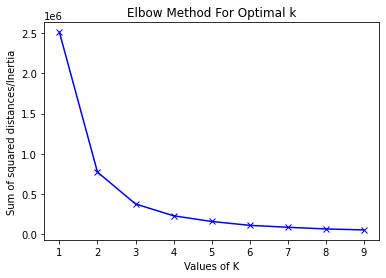

In [19]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(np.array(default.AGE).reshape((-1, 1)))
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
k_list = np.arange(30, 120, step = 15)

In [ ]:
train_mean_score = []
test_mean_score = []
for k in k_list:
    model = KNeighborsClassifier(n_neighbors = k)
    train_score, test_score = multi_split(x,y,model, 3)
    train_mean_score.append(train_score.mean())
    test_mean_score.append(test_score.mean())


In [ ]:
k_list = np.arange(30, 120, step = 8)


In [ ]:
result1.set_index("K").plot()

In [ ]:
# 更细节的模型
k_list = np.arange(30, 120, step = 8)
train_mean_score = []
test_mean_score = []
for k in k_list:
    model = KNeighborsClassifier(n_neighbors = k)
    train_score, test_score = multi_split(x,y,model, 3)
    train_mean_score.append(train_score.mean())
    test_mean_score.append(test_score.mean())
result1 = pd.DataFrame(data ={"K" : k_list, "TRAIN" : train_mean_score, "TEST": test_mean_score})
result1.set_index("K").plot()

In [5]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(np.array(default.AGE).reshape((-1, 1)))

KMeans(n_clusters=4)

In [6]:
default['age_group'] = kmeans.labels_

In [7]:
print ((default[default.age_group == 0].shape[0],  round(default[default.age_group == 0].AGE.mean(),2)),
(default[default.age_group == 1].shape[0], round(default[default.age_group == 1].AGE.mean(),2)) , 
(default[default.age_group == 2].shape[0], round(default[default.age_group == 2].AGE.mean(),2)),
       (default[default.age_group == 3].shape[0], round(default[default.age_group == 3].AGE.mean(),2)))

(7837, 33.91) (6838, 41.56) (10899, 26.54) (4027, 52.29)


In [8]:
# segment '0'
(default[default.age_group == 0])
X0 = default[default.age_group == 0].drop(columns=['default payment next month','AGE'],axis=1)
y0= default[default.age_group == 0]['default payment next month']
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=.3,random_state=0)

print('Training data:', X0_train.shape)
print('Validation data:', X0_test.shape)

Training data: (5485, 24)
Validation data: (2352, 24)


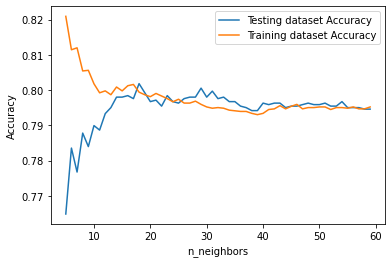

In [9]:
neighbors = np.arange(5, 60)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
%matplotlib inline
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X0_train, y0_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X0_train, y0_train)
    test_accuracy[i] = knn.score(X0_test, y0_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

##K 18

In [16]:
#segment '1'
(default[default.age_group == 1])
X1 = default[default.age_group == 1].drop(columns=['default payment next month','AGE'],axis=1)
y1= default[default.age_group == 1]['default payment next month']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.3,random_state=0)

print('Training data:', X1_train.shape)
print('Validation data:', X1_test.shape)

Training data: (4786, 24)
Validation data: (2052, 24)


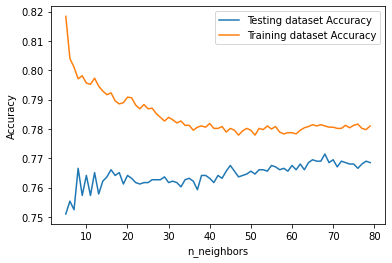

In [17]:
neighbors = np.arange(5, 80)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
%matplotlib inline
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train, y1_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X1_train, y1_train)
    test_accuracy[i] = knn.score(X1_test, y1_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
# segment '2'
(default[default.age_group == 2])
X2 = default[default.age_group == 2].drop(columns=['default payment next month','AGE'],axis=1)
y2= default[default.age_group == 2]['default payment next month']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.3,random_state=0)

print('Training data:', X2_train.shape)
print('Validation data:', X2_test.shape)

Training data: (7629, 24)
Validation data: (3270, 24)


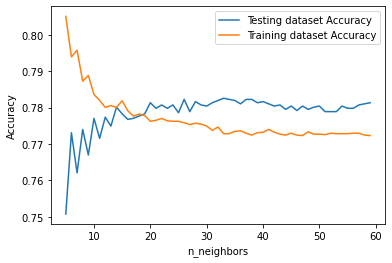

In [13]:
neighbors = np.arange(5, 60)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
%matplotlib inline
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X2_train, y2_train)
    test_accuracy[i] = knn.score(X2_test, y2_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:
# segment '3'
(default[default.age_group == 3])
X3 = default[default.age_group == 3].drop(columns=['default payment next month','AGE'],axis=1)
y3= default[default.age_group == 3]['default payment next month']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=.3,random_state=0)

print('Training data:', X3_train.shape)
print('Validation data:', X3_test.shape)

Training data: (2818, 24)
Validation data: (1209, 24)


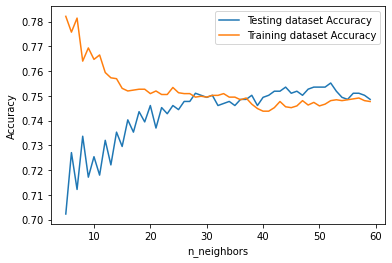

In [15]:
neighbors = np.arange(5, 60)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
%matplotlib inline
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X3_train, y3_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X3_train, y3_train)
    test_accuracy[i] = knn.score(X3_test, y3_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()